This code is for EN5423 class at GIST, Republic of Korea, and created by Dr. Hyunglok Kim.  
**Contact information**: hyunglokkim@gist.ac.kr  
**License**: This work is licensed for non-commercial use only.  
**Restrictions**: Do not use this material without permission for teaching or developing other classes.

In [53]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive/'

In [9]:
# Example of how to call the function
FP = base_FP + '/GIST/0.Lectures/2024_Spring/EN5423/datasets/week02'
input_file = 'usgs-streamflow-nldas_hourly.nc'

# Open the NetCDF file
dataset = nc.Dataset(os.path.join(FP, input_file), mode='r')

# Print the variables
print("Variables in the NetCDF file:")
for var in dataset.variables:
    print(var)

Variables in the NetCDF file:
date
convective_fraction
longwave_radiation
potential_energy
potential_evaporation
pressure
shortwave_radiation
specific_humidity
temperature
total_precipitation
wind_u
wind_v
qobs_mm_per_hour
qobs_count
qualifiers
utcoffset_hours
rel_deviation_from_camels
qobs_CAMELS_mm_per_hour
basin


In [14]:
# Extract streamflow, precipitation, and time data
streamflow_data = dataset.variables['qobs_mm_per_hour'][0, :]
precipitation_data = dataset.variables['total_precipitation'][0, :]
times = nc.num2date(dataset.variables['date'][:], units="hours since 2000-01-01 00:00:00", calendar="proleptic_gregorian")

# Since direct conversion of cftime to pandas datetime might not work, let's do a workaround
# Convert cftime objects to strings and then to pandas datetime
time_strings = [str(time) for time in times]  # Convert cftime objects to strings
time_datetimes = pd.to_datetime(time_strings)  # Convert strings to pandas datetime objects

# Convert to pandas DataFrame
df = pd.DataFrame({'Streamflow': streamflow_data, 'Precipitation': precipitation_data.flatten()}, index=time_datetimes)

In [38]:
df

,Streamflow,Precipitation
2000-01-01 00:00:00,0.019569,0.0
2000-01-01 01:00:00,0.019569,0.0
2000-01-01 02:00:00,0.019330,0.0
2000-01-01 03:00:00,0.019092,0.0
2000-01-01 04:00:00,0.019092,0.0
...,...,...
2002-12-31 19:00:00,0.027683,0.0
2002-12-31 20:00:00,0.027683,0.0
2002-12-31 21:00:00,0.027683,0.0
2002-12-31 22:00:00,0.027683,0.0


### Exercise 1: Histograms

<Axes: >

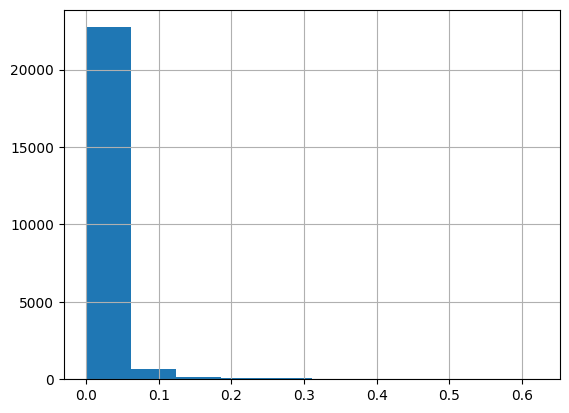

In [19]:
df.Streamflow.hist()

(array([2.2727e+04, 6.4600e+02, 1.6300e+02, 8.4000e+01, 5.4000e+01,
        2.2000e+01, 1.2000e+01, 1.1000e+01, 8.0000e+00, 7.0000e+00]),
 array([2.62508896e-04, 6.22838177e-02, 1.24305122e-01, 1.86326429e-01,
        2.48347744e-01, 3.10369045e-01, 3.72390360e-01, 4.34411675e-01,
        4.96432960e-01, 5.58454275e-01, 6.20475590e-01]),
 <BarContainer object of 10 artists>)

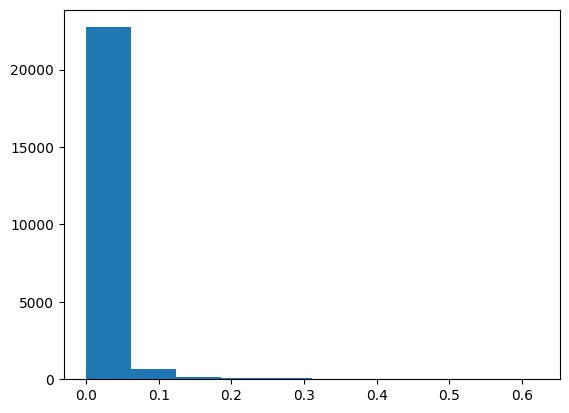

In [21]:
plt.hist(df.Streamflow)

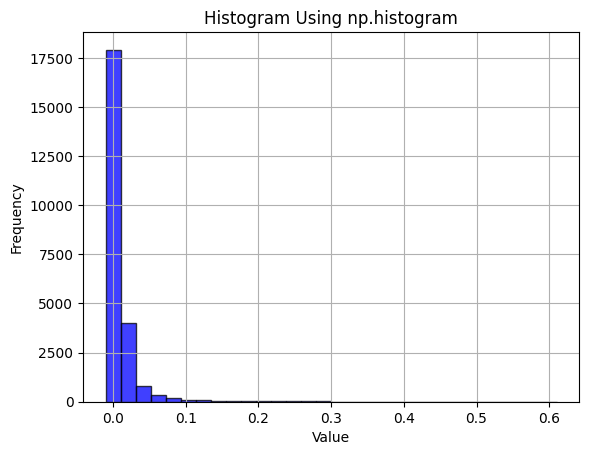

In [32]:
# Use np.histogram to compute the bins
streamflow_clean = df['Streamflow'].dropna().values
hist, bin_edges = np.histogram(streamflow_clean, bins=30)

# To plot the histogram, we need to manually plot it using matplotlib
plt.grid()
plt.bar(bin_edges[:-1], hist, width = np.diff(bin_edges), edgecolor='black', alpha=0.75, color='blue')

plt.title('Histogram Using np.histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Exercise 2 (Quantile Plots)

In [34]:
# Step 1: Sort the data using np.sort for a NumPy array
streamflow_sorted = np.sort(streamflow_clean)

# Step 2: Create an index array, i, starting from 1 to n
i = np.arange(1, len(streamflow_sorted) + 1)

# Step 3: Calculate p = i / (n + 1)
n = len(streamflow_sorted)
p = i / (n + 1)

# Create a DataFrame to hold these values
df_streamflow = pd.DataFrame({
    'i': i,
    'Ranked_Streamflow': streamflow_sorted,
    'p': p
})

# Display the DataFrame
print(df_streamflow)

           i  Ranked_Streamflow         p
0          1           0.000263  0.000042
1          2           0.000263  0.000084
2          3           0.000263  0.000126
3          4           0.000263  0.000169
4          5           0.000263  0.000211
...      ...                ...       ...
23729  23730           0.577520  0.999789
23730  23731           0.594821  0.999831
23731  23732           0.607947  0.999874
23732  23733           0.616299  0.999916
23733  23734           0.620476  0.999958

[23734 rows x 3 columns]


### HW03 #1

1) Based on the Blom formula (refer Table 2 in the w03 lecture note), plot the quantile plot for the streafmlow data loaded from Exercise 2.
2) What is the values of p_10, p_1000, p_10000, and p_20000?

### Exercise 3: Boxplots

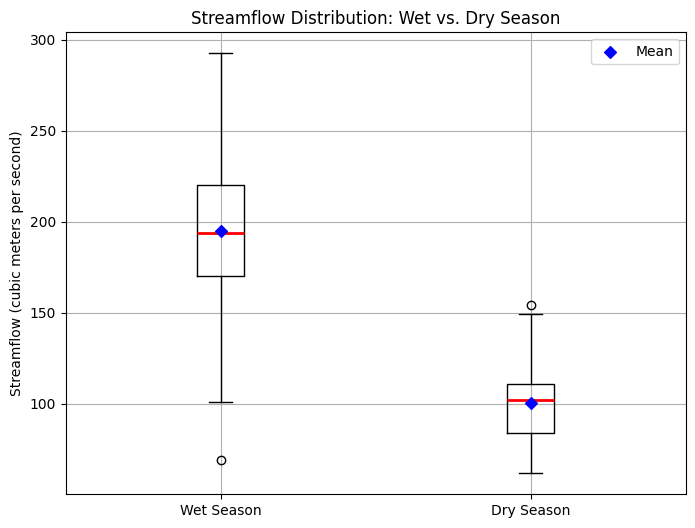

In [37]:
# Generate synthetic streamflow data
np.random.seed(42)  # Ensure reproducibility
wet_season_flow = np.random.normal(200, 50, 100)  # Mean=200, SD=50, n=100
dry_season_flow = np.random.normal(100, 20, 100)  # Mean=100, SD=20, n=100

# Create a boxplot and highlight the median
plt.figure(figsize=(8, 6))
bp = plt.boxplot([wet_season_flow, dry_season_flow], labels=['Wet Season', 'Dry Season'],
                 medianprops={'color':'red', 'linewidth':2},  # Customize median properties
                 showmeans=False)  # Do not use the built-in mean marker

# Calculate means
means = [np.mean(wet_season_flow), np.mean(dry_season_flow)]

# Add means to the boxplot
plt.scatter([1, 2], means, color='blue', marker='D', label='Mean', zorder=3)

plt.title('Streamflow Distribution: Wet vs. Dry Season')
plt.ylabel('Streamflow (cubic meters per second)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

### HW03 #2

### Streamflow Data Analysis Using Boxplots

#### Objective
Utilize the provided streamflow data (`streamflow_clean`) above to conduct a comprehensive analysis using boxplots. This dataset represents the streamflow measurements (in cubic meters per second) collected over various periods, with all missing values already removed.

#### Background
Streamflow, or the flow of water in streams and rivers, is a critical component of the water cycle, influenced by weather, climate, and human activities. Understanding the distribution and variability of streamflow is essential for effective water resource management, ecological studies, and flood risk assessment.

#### Instructions
Begin your analysis by importing the necessary Python libraries:
- `matplotlib` for plotting,
- `numpy` for numerical operations, and
- `pandas` for data manipulation.

#### Tasks and Questions

**1. Basic Boxplot Analysis**
- **Task:** Create a boxplot of the entire `streamflow_clean` dataset.
- **Question 1:** What does the boxplot reveal about the central tendency (median) and variability (interquartile range) of the streamflow data? Discuss any visible skewness or outliers in the context of potential environmental implications.

**2. Seasonal Comparison**
- **Task:** Compare the streamflow distributions between the wet and dry seasons
- **Question 2:** How do the central tendencies and variabilities differ?
- 2-1) What might these differences indicate about seasonal impacts on streamflow? (check the df data below)
- 2-2) How do the variabilities (interquartile ranges) of streamflow differ between the wet and dry seasons?
- 2-3) What implications could these seasonal differences in streamflow have for water resource management and ecological health in the region?

In [43]:
df.index = pd.to_datetime(df.index)

# Define a function to label seasons based on the month
def label_season(date):
    if date.month in [11, 12, 1, 2, 3, 4]:
        return 'Wet'
    else:
        return 'Dry'

# Apply the function to create a 'Season' column
df['Season'] = df.index.map(label_season)
df

,Streamflow,Precipitation,Season
2000-01-01 00:00:00,0.019569,0.0,Wet
2000-01-01 01:00:00,0.019569,0.0,Wet
2000-01-01 02:00:00,0.019330,0.0,Wet
2000-01-01 03:00:00,0.019092,0.0,Wet
2000-01-01 04:00:00,0.019092,0.0,Wet
...,...,...,...
2002-12-31 19:00:00,0.027683,0.0,Wet
2002-12-31 20:00:00,0.027683,0.0,Wet
2002-12-31 21:00:00,0.027683,0.0,Wet
2002-12-31 22:00:00,0.027683,0.0,Wet


In [45]:
# Split data into wet and dry seasons for boxplot
wet_season_flow = df[df['Season'] == '?']['Streamflow'].dropna().values
dry_season_flow = df[df['Season'] == '?']['Streamflow'].dropna().values

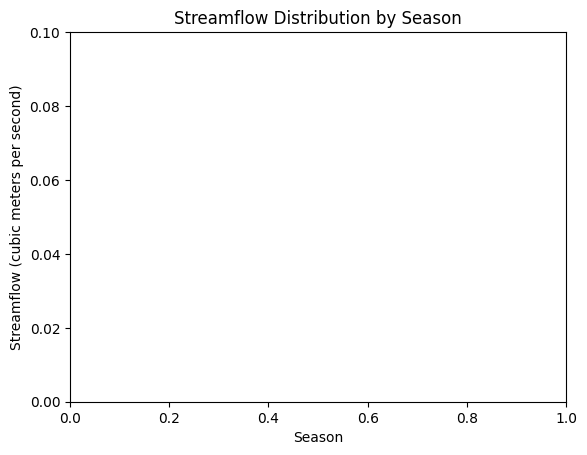

In [48]:
# Create side-by-side boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(?, labels=['Wet Season', 'Dry Season'])
plt.title('Streamflow Distribution by Season')
plt.ylabel('Streamflow (cubic meters per second)')
plt.xlabel('Season')
plt.ylim([0, 0.1])
plt.show()

### Exercise 4: Probability (Q-Q) Plots

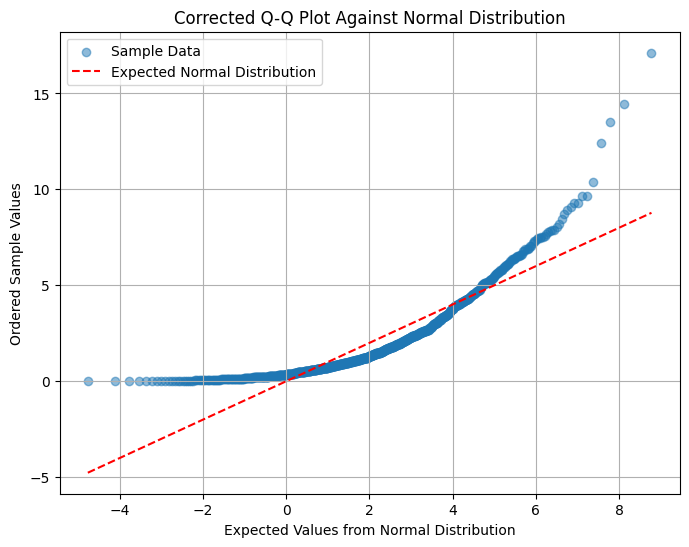

In [52]:
# 4-1) Q-Q plots with the equations.
# Generate skewed sample data
np.random.seed(0)
data = np.random.exponential(scale=2.0, size=1000)  # Exponential data is skewed

# Calculate the mean (Q_bar) and standard deviation (s_Q) of the data
Q_bar = np.mean(data)
s_Q = np.std(data)

# Sort the data
data_sorted = np.sort(data)

# Calculate plotting positions using the Weibull formula: p_i = (i - 0.5) / n
n = len(data_sorted)
p_i = (np.arange(1, n + 1) - 0.5) / n

# Convert plotting positions to z-scores using the inverse CDF of the standard normal distribution
z = stats.norm.ppf(p_i)

# Calculate expected Q values using the equation Q = Q_bar + z * s_Q
expected_Q = Q_bar + z * s_Q

# Create the Q-Q plot
plt.figure(figsize=(8, 6))
plt.scatter(expected_Q, data_sorted, alpha=0.5, label="Sample Data")
plt.plot(expected_Q, expected_Q, 'r--', label="Expected Normal Distribution")

plt.title("Corrected Q-Q Plot Against Normal Distribution")
plt.xlabel("Expected Values from Normal Distribution")
plt.ylabel("Ordered Sample Values")
plt.legend()
plt.grid(True)
plt.show()

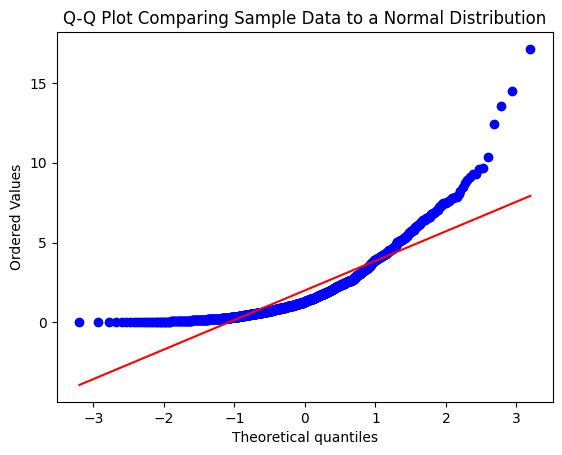

In [50]:
# Exercise 4-2) we can use stats.probplot
# Generate skewed sample data

# Generate Q-Q plot
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(data, dist="norm", plot=ax)

ax.set_title("Q-Q Plot Comparing Sample Data to a Normal Distribution")
plt.show()

### Exercise 5: Side-by-side Boxplots

In [59]:
FP = base_FP + '/GIST/0.Lectures/2024_Spring/EN5423/datasets/week03'
input_file = 'IllinoisNitrate.ILLNO23.csv'
df_Ill = pd.read_csv(os.path.join(FP, input_file))
df_Ill

,Date,Month,Conc
0,1999-10-12,10,3.02
1,1999-11-16,11,2.15
2,1999-12-13,12,3.54
3,2000-01-12,1,2.99
4,2000-02-08,2,4.46
...,...,...,...
181,2015-06-17,6,4.18
182,2015-06-29,6,3.60
183,2015-08-06,8,2.06
184,2015-09-01,9,1.69


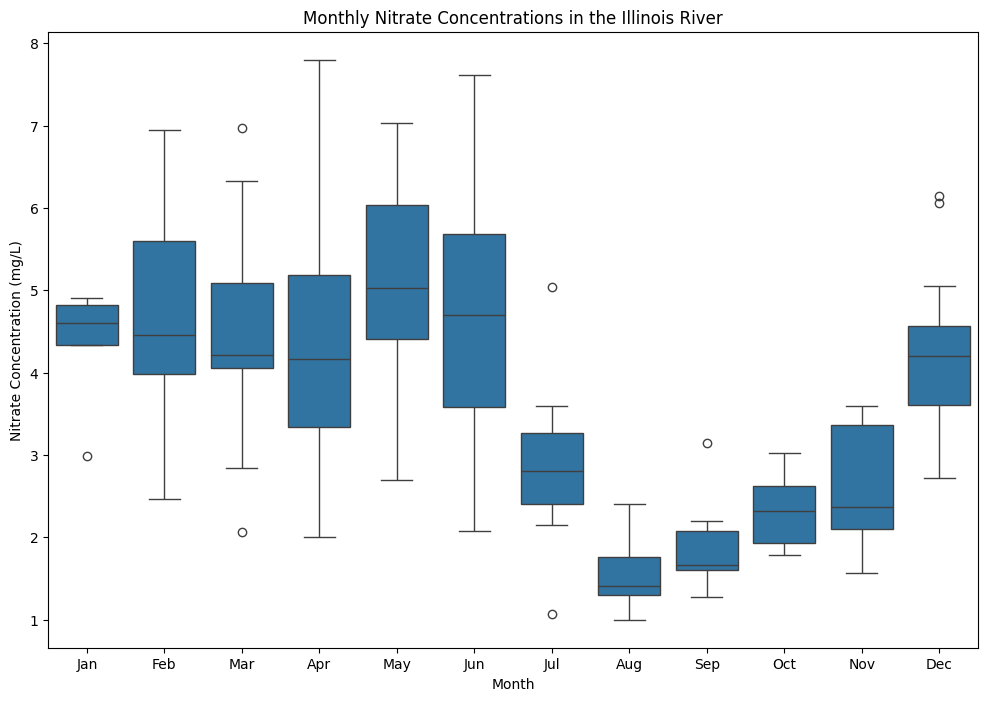

In [61]:
# Ensure 'Month' is treated as a categorical variable for correct sorting in the plot
df_Ill['Month'] = pd.Categorical(df_Ill['Month'], categories=np.arange(1, 13), ordered=True)

# Generate side-by-side boxplots by month
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Conc', data=df_Ill)

plt.title('Monthly Nitrate Concentrations in the Illinois River')
plt.xlabel('Month')
plt.ylabel('Nitrate Concentration (mg/L)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

### HW03 #3

### Seasonal Trends in Nitrate Concentrations

Watch this video for an overview of how nitrate concentrations can vary with seasons:

[![Seasonal Trends in Nitrate Concentrations](http://img.youtube.com/vi/M8e_b51tUq8/0.jpg)](https://youtu.be/M8e_b51tUq8 "Seasonal Trends in Nitrate Concentrations")


#### Objective
Use the "IllinoisNitrate.ILLNO23.csv" dataset to explore the nitrate concentration levels in the Illinois River at Valley City, Illinois. Through this analysis, you will gain insights into seasonal patterns and basic hydrological processes.

#### Instructions
Review the dataset containing nitrate concentration measurements across different months. Create side-by-side boxplots for each month using Python to visualize the data. Based on your plots, answer the following questions to understand the nitrate concentration trends.

#### Tasks and Questions

**1. Identifying Seasonal Peaks**
- **Question 1:** In which season do the nitrate concentrations seem to be the highest? Can you think of any natural seasonal changes that might explain this trend?

**2. Observing Low Concentration Periods**
- **Question 2:** During which months are the nitrate concentrations the lowest? Hypothesize why these months might have lower nitrate levels.

**3. Examining Variability and Outliers**
- **Question 3:** Look at the boxplots and identify any months with particularly high variability in nitrate concentrations or noticeable outliers. What might be the cause of this variability or these outliers?